**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2021</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 02, 2022 17:00 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "hakansivuk@gmail.com".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "package_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) Why do people use validation data?<br>
  Answer: Validation data is used to validate the model's performance during training which is helpful to avoid overfitting because validation data is like a tool that determines whether the training is moving in the right direction or not.

  >b) What is the difference between mean squared error and mean absolute error?  <br>
  Answer: Mean squared error measures the variance of the residuals whereas mean absolute error measures the average of the residuals.

  >c) What is the main problem of using sigmoid as activation function in an artificial neural network (ANN)?<br>
  Answer: Sigmoid function tends to vanish the gradient because derivative of the sigmoid is always less than 1 and if we have many layers, the product of these results will go to 0 very fast which will vanish the gradient.

>d) What does it mean to overfit your data model?<br>
Answer: When the model is trained too long or the model is too complex, the model starts to memorize the noise and fits too close to the training data which results in performing bad at unseen, test data. 

  >e) Your input image size is 3x64x64. If you apply 3x3 convolution with input_channel=3, output_channel=6, padding=0, stride=2, what would be the size of the output?<br>
  Answer: 6x31x31

  >f) In the previous question, how many trainable parameters are there? (you should also consider bias terms in addition to weights)<br>
  Answer:((shape of width of filter x shape of height filter x number of filters in the previous layer+1) x number of filters) = ((3x3x3+1)x6) = 168




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify scenes according to their contexts by using simple machine learning algorithms developed for CV problems on scene images.

Your dataset consist of scene images from 4 contexts. Images of each context is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 2500 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/file/d/1l51t3aTY7B131fwq92ACI_b_D5Idq5In/view?usp=sharing
<br>

Libraries that are required in this question is given in the following code cell.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models

# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt

torch.manual_seed(42)
torch.cuda.manual_seed(42)
np.random.seed(42)

# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.
import os

Mounted at /content/drive


### Data Loader [6 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "SceneDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of SceneDataset, should be retrieved using the "get_dataset" function.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [ ]:
class SceneDataset(Dataset):
    # TODO:
    # Define constructor for SceneDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, features, labels): # you are free to change parameters
        self.features = features 
        self.labels = labels

    '''This function should return sample count in the dataset'''
    def __len__(self):
        return len(self.features)

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        sample = []
        label = None
        if index < len(self.labels):
            sample = torch.from_numpy(self.features[index]).float()
            label = self.labels[index]
        return sample, label

In [ ]:
labelAndNames = {0: "sea", 1: "forest", 2: "glacier", 3: "mountain"}

In [ ]:
labelAndNames.values()

dict_values(['sea', 'forest', 'glacier', 'mountain'])

In [ ]:
def normalize(image):
    pixels = np.asarray(image)
    pixels = pixels.astype('float32')
    pixels /= 255.0
    return pixels

each image has 90x90 size, so there are 8100 pixels. Output layer has 4 outputs. The hidden layer has 8100 neurons and the input layer has 8100 inputs.

In [ ]:
def get_dataset(root, isGray):
    # TODO: 
    # Read dataset files
    sea_X = list() #0
    forest_X = list() #1
    glacier_X = list() #2
    mountain_X = list() #3
    for file in os.listdir(root):
        path = root + "/"
        file_name = path+file
        for image in os.listdir(file_name):
            img = file_name + "/" + image
            image = Image.open(img,"r") 
            if isGray:
                image = image.convert('L')
            width, height = image.size
            pixel_values = list(image.getdata())
            if image.mode == "RGB":
                channels = 3
            elif image.mode == "L":
                channels = 1
            pixel_values = np.array(pixel_values).reshape((width, height, channels))
            if file == "sea":
                sea_X.append(((pixel_values - np.min(pixel_values)) / (np.max(pixel_values) - np.min(pixel_values))))
            elif file == "forest":
                forest_X.append(((pixel_values - np.min(pixel_values)) / (np.max(pixel_values) - np.min(pixel_values))))
            elif file == "glacier":
                glacier_X.append(((pixel_values - np.min(pixel_values)) / (np.max(pixel_values) - np.min(pixel_values))))
            elif file == "mountain":
                mountain_X.append(((pixel_values - np.min(pixel_values)) / (np.max(pixel_values) - np.min(pixel_values))))
    X = sea_X + forest_X + glacier_X + mountain_X
    Y = list()
    for _ in range(2500):
        Y.append(0)
    for _ in range(2500):
        Y.append(1)
    for _ in range(2500):
        Y.append(2)
    for _ in range(2500):
        Y.append(3)

    # Construct training, validation and test sets
    # train (70%), validation (10%) and test (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42) # 0.125 x 0.8 = 0.1

    # Normalize datasets
    #done above
    
    #return train_dataset, val_dataset, test_dataset
    return X_train, X_test, X_val, y_train, y_test, y_val

###Model Implementation [7 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 3 layers of convolution: 
<ul>
    <li>(1) 4 filters with size of 3 x 3 with stride 1 and padding 1, (2) ReLU </li>
    <li>(3) 8 filters with size of 3 x 3 with stride 1 and padding 1, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 16 filters with size of 3 x 3 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [ ]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, **kwargs): # you can add any additional parameters you want 
        super(ConvNet, self).__init__()
    # TODO:
    # You should create your neural network here
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 4, kernel_size=3, stride=1, padding=1) #in feature 3
        self.relu = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels = 4, out_channels = 8, kernel_size=3,stride=1,padding=1)
        self.maxpool = nn.MaxPool2d(2)
        self.conv3 = nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size=3,stride=1,padding=1)
        self.fc = nn.Linear(in_features = 7744, out_features = 4) #??????????????????????????????????????????????????????????
        self.output = nn.Softmax(dim=1)
   
    def forward(self, X): # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here
        x = self.conv1(X)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.reshape(x.shape[0], -1)
        x = self.fc(x)
        x = self.output(x)
        return x

###Stochastic Gradient Descent [25 pts.]

####Training with SGD [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Data retrival takes ~5 min.

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = get_dataset("drive/My Drive/data", True) 

sample data

In [ ]:
X_train[10].shape

(90, 90, 1)

mountain


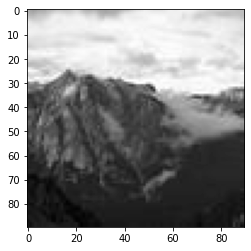

In [ ]:
image1 = X_train[10]
plt.imshow(image1.squeeze(), cmap=plt.get_cmap('gray'))
print(labelAndNames[y_train[10]])

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset" function. Use SGD as your optimizer. Tune
your learning rate, weight decay. Do not add additional parameters to SGD. Save your best model as "best_cnn_sgd.pth". The best model
should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model. However,
you must explain your reasoning in your choice.

Answer: I have tried 4 different learning rates from the interval [1e-1, 1e-4].

When learning_rate = 0.1, the best validation loss = 1.0275169

When learning_rate = 0.01, the best validation loss = 1.0693998

When learning_rate = 0.001, the best validation loss = 1.0508654

When learning_rate = 0.0001, the best validation loss = 1.18950897

The best validation loss comes from learning_rate = 0.1 however, except the learning_rate = 0.0001, all the other CNN SGD models shows an overfitting curve in the loss plots which means that as training loss decreases, validation loss decreases but at some point it starts to increase. When learning_rate = 0.0001, the train loss decreases ro a point of stability as well as the validation loss with a minimal gap in between them which shows a good fit. 

In [ ]:
# TODO:
# Pick your hyper parameters
max_epoch = 300
train_batch = 32
test_batch = 64
learning_rate = 0.0001 # try learning rate from the interval [1e-1, 1e-4]  0.0001, 0.001, 0.01 and 0.1

In [ ]:
# HINT: note that your training time should not take more than 2 hours.
use_gpu = torch.cuda.is_available()

# Create train dataset loader
train = SceneDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=train_batch)

# Create validation dataset loader
val = SceneDataset(X_val, y_val)
validation_loader = DataLoader(val, batch_size=test_batch)

# Create test dataset loader
test = SceneDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=test_batch)

In [ ]:
# initialize your network
model_CNN = ConvNet()

# define your loss function
criterion = nn.CrossEntropyLoss() #softmax ve cross entropy beraber kullanılmıyor
    
optimizer = torch.optim.SGD(model_CNN.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with weight_decay as well but do not add additional parameters
    
if use_gpu:
    model_CNN = model_CNN.cuda()
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
PATH_CNN_SGD = "drive/My Drive/best_cnn_sgd.pth"
min_vald_loss = np.inf
history = {'train_accuracy': [], 'vald_accuracy':[], 'train_loss': [], 'vald_loss': []}
    
for epoch in range(max_epoch):
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        input = inputs.permute(0, 3, 1, 2)
        outputs = model_CNN(input.float())
        preds = torch.argmax(outputs, dim=1)
        train_correct += torch.sum(preds==labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

#    Validation
    with torch.no_grad():
        vald_loss = 0.0
        vald_correct = 0
        for data in validation_loader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            images = images.permute(0, 3, 1, 2)
            outputs = model_CNN(images.float())
            preds = torch.argmax(outputs, dim=1)
            vald_correct += torch.sum(preds==labels)
            loss = criterion(outputs, labels)
            vald_loss += loss.item()
    print(f'Epoch {epoch+1}:\t\t train_loss: {(train_loss / len(train_loader)):.2f}\t\t train_accuracy: {(train_correct / (len(train_loader) * train_batch)):.2f}\t\t validation_loss: {(vald_loss / len(validation_loader)):.2f}\t\t validation_accuracy: {(vald_correct / (len(validation_loader) * test_batch)):.2f}')
    if (vald_loss / len(validation_loader)) < min_vald_loss:
        print(f'Saving new best CNN SGD with vald_loss: {(vald_loss / len(validation_loader)):.2f}')
        min_vald_loss = (vald_loss / len(validation_loader))
        torch.save(model_CNN.state_dict(), PATH_CNN_SGD)

    history['train_loss'].append(train_loss / len(train_loader))
    history['vald_loss'].append(vald_loss / len(validation_loader))
    history['train_accuracy'].append(train_correct / (len(train_loader) * train_batch))
    history['vald_accuracy'].append(vald_correct / (len(validation_loader) * test_batch))

print(f'Best validation loss: {min_vald_loss}')

# plot losses vs epoch 
plt.plot([i+1 for i in range(max_epoch)], history['train_loss'], label='training loss')
plt.plot([i+1 for i in range(max_epoch)], history['vald_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Losses')
plt.legend(loc='upper right')
plt.show()

# plot accuracies vs epoch
plt.plot([i+1 for i in range(max_epoch)], history['train_accuracy'], label='training accuracy')
plt.plot([i+1 for i in range(max_epoch)], history['vald_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracies')
plt.legend(loc='upper left')
plt.show()

torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size([32, 7744])
torch.Size(

KeyboardInterrupt: ignored

####Test with SGD [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

In [ ]:
def plot_cm(cm, class_labels):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=range(len(class_labels)),
           yticks=range(len(class_labels)),
           xticklabels=class_labels, yticklabels=class_labels,
           title="Confusion Matrix",
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Macro Precision: 0.5234653889462624 Macro Recall: 0.5417493494705613 Macro F1: 0.5252714901380229
Accuracy 0.5405
Accuracies for each class:
	Accuracy for sea              0.291015625
	Accuracy for forest           0.862
	Accuracy for glacier          0.483739837398374
	Accuracy for mountain         0.530241935483871


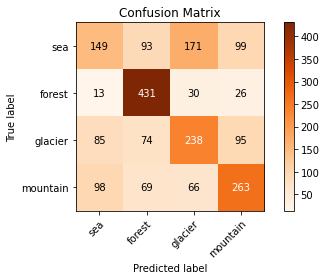

In [ ]:
# Test CNN
# load best model
model_cnn = ConvNet()
model_cnn.load_state_dict(torch.load(PATH_CNN_SGD))

# evaluate on test set
# model = model.eval()

predictions = []

with torch.no_grad():
#   iterate over test batches
    for data in test_loader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        #images, labels = images.cuda(), labels.cuda()
        outputs = model_cnn(images.float())
        _, predicted2 = torch.max(outputs.data, 1)
        predictions.extend(predicted2.tolist())

#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

cm = confusion_matrix(test.labels,predictions)
# plot confusion matrix
plot_cm(cm, labelAndNames.values())
pscore = precision_score(test.labels, predictions, average="macro")
rscore = recall_score(test.labels, predictions, average="macro")
f1 = f1_score(test.labels, predictions, average="macro")
print("Macro Precision:", pscore, "Macro Recall:", rscore,"Macro F1:" ,f1)
print("Accuracy", accuracy_score(test.labels,predictions))
acc_per_class = cm.diagonal()/cm.sum(1)
print("Accuracies for each class:")
for i, acc in enumerate(acc_per_class):
    print(f'\tAccuracy for {labelAndNames[i]}'.ljust(30, ' '), acc)

###Adam Optimizer [25 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [15 pts.]

Train your model up to 300 epochs with properly processed inputs, i.e. call your "get_dataset". This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best model as "best_cnn_adam.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Answer: I have tried 4 different learning rates from the interval [1e-1, 1e-4].

When learning_rate = 0.1, the best validation loss = 1.38624297

When learning_rate = 0.01, the best validation loss = 0.9764694

When learning_rate = 0.001, the best validation loss = 0.97007933

When learning_rate = 0.0001, the best validation loss = 1.0264486

0.1 and 0.01 learning rate shows lots of fluctuations in both train and validation loss. Both learning rates are not suitable to be called as a good fit because their loss plot shows an overfitting curve whereas 0.001 and 0.0001 learning rates shows a better plot but comparing these two 0.001 learning rate is better since its validation is less.

In [ ]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 300
train_batch = 32
test_batch = 64
learning_rate = 0.1 # try learning rate from the interval [1e-1, 1e-4] # try learning rate from the interval [1e-1, 1e-4]  0.0001, 0.001, 0.01 and 0.1

# Create train dataset loader
# Create validation dataset loader
# Create test dataset loader
use_gpu = torch.cuda.is_available()

# Create train dataset loader
train = SceneDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=train_batch)

# Create validation dataset loader
val = SceneDataset(X_val, y_val)
validation_loader = DataLoader(val, batch_size=test_batch)

# Create test dataset loader
test = SceneDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=test_batch)

Epoch 1:		 train_loss: 1.49		 train_accuracy: 0.25		 validation_loss: 1.50		 validation_accuracy: 0.24
Saving new best CNN Adam with vald_loss: 1.50
Epoch 2:		 train_loss: 1.50		 train_accuracy: 0.25		 validation_loss: 1.50		 validation_accuracy: 0.24
Epoch 3:		 train_loss: 1.49		 train_accuracy: 0.25		 validation_loss: 1.50		 validation_accuracy: 0.24
Epoch 4:		 train_loss: 1.47		 train_accuracy: 0.25		 validation_loss: 1.50		 validation_accuracy: 0.24
Epoch 5:		 train_loss: 1.40		 train_accuracy: 0.25		 validation_loss: 1.39		 validation_accuracy: 0.25
Saving new best CNN Adam with vald_loss: 1.39
Epoch 6:		 train_loss: 1.39		 train_accuracy: 0.25		 validation_loss: 1.39		 validation_accuracy: 0.25
Saving new best CNN Adam with vald_loss: 1.39
Epoch 7:		 train_loss: 1.39		 train_accuracy: 0.25		 validation_loss: 1.39		 validation_accuracy: 0.25
Saving new best CNN Adam with vald_loss: 1.39
Epoch 8:		 train_loss: 1.39		 train_accuracy: 0.25		 validation_loss: 1.39		 validation_accurac

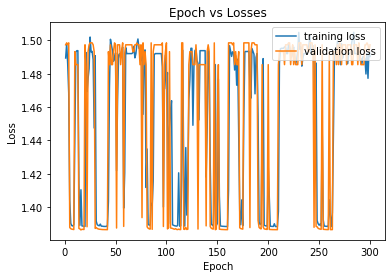

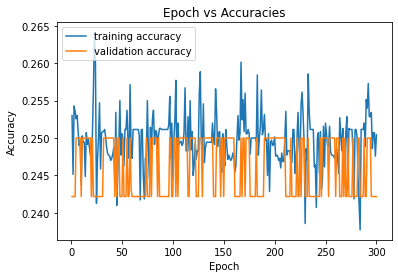

In [ ]:
# initialize your network
model_CNN = ConvNet()
    
optimizer = torch.optim.Adam(model_CNN.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# define your loss function
criterion = nn.CrossEntropyLoss()
if use_gpu:
    model_CNN = model_CNN.cuda()
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
PATH_CNN_ADAM = "drive/My Drive/best_cnn_adam.pth"
min_vald_loss = np.inf
history = {'train_accuracy': [], 'vald_accuracy':[], 'train_loss': [], 'vald_loss': []}
    
for epoch in range(max_epoch):
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        input = inputs.permute(0, 3, 1, 2)
        outputs = model_CNN(input.float())
        preds = torch.argmax(outputs, dim=1)
        train_correct += torch.sum(preds==labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

#    Validation
    with torch.no_grad():
        vald_loss = 0.0
        vald_correct = 0
        for data in validation_loader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            images = images.permute(0, 3, 1, 2)
            outputs = model_CNN(images.float())
            preds = torch.argmax(outputs, dim=1)
            vald_correct += torch.sum(preds==labels)
            loss = criterion(outputs, labels)
            vald_loss += loss.item()
    print(f'Epoch {epoch+1}:\t\t train_loss: {(train_loss / len(train_loader)):.2f}\t\t train_accuracy: {(train_correct / (len(train_loader) * train_batch)):.2f}\t\t validation_loss: {(vald_loss / len(validation_loader)):.2f}\t\t validation_accuracy: {(vald_correct / (len(validation_loader) * test_batch)):.2f}')
    if (vald_loss / len(validation_loader)) < min_vald_loss:
        print(f'Saving new best CNN Adam with vald_loss: {(vald_loss / len(validation_loader)):.2f}')
        min_vald_loss = (vald_loss / len(validation_loader))
        torch.save(model_CNN.state_dict(), PATH_CNN_ADAM)

    history['train_loss'].append(train_loss / len(train_loader))
    history['vald_loss'].append(vald_loss / len(validation_loader))
    history['train_accuracy'].append(train_correct / (len(train_loader) * train_batch))
    history['vald_accuracy'].append(vald_correct / (len(validation_loader) * test_batch))

print(f'Best validation loss: {min_vald_loss}')

# plot losses vs epoch 
plt.plot([i+1 for i in range(max_epoch)], history['train_loss'], label='training loss')
plt.plot([i+1 for i in range(max_epoch)], history['vald_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Losses')
plt.legend(loc='upper right')
plt.show()

# plot accuracies vs epoch
plt.plot([i+1 for i in range(max_epoch)], history['train_accuracy'], label='training accuracy')
plt.plot([i+1 for i in range(max_epoch)], history['vald_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracies')
plt.legend(loc='upper left')
plt.show()


####Test with ADAM [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

Answer: These two optimizer work differently from each other and for this dataset it is much more convenient to use SGD because its 0.0001 learning rate model is the best good fit compared to other models and since our main purpose is to generalize the data as much as we can, we can choose this as the best model. However, comparing test results, Adam gives a better picture. In all tried learning rates, Adam gave a good accuracy (we use accuracy as the performance metric since there is no class imbalance) in classes sea, glacier and mountain. These classes have similar accuracies where forest has always the highest accuracy. However, this observation is not totally valid for SGD because all SGD models are bad at predicting sea class but good at forest. 

Macro Precision: 0.7531975955944679 Macro Recall: 0.7548220858330056 Macro F1: 0.7529657137638512
Accuracy 0.755
Accuracies for each class:
	Accuracy for sea              0.712890625
	Accuracy for forest           0.964
	Accuracy for glacier          0.7073170731707317
	Accuracy for mountain         0.6350806451612904


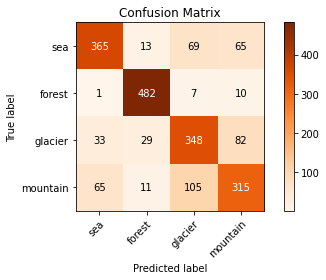

In [ ]:
# Test CNN
# load best model
model_cnn = ConvNet()
model_cnn.load_state_dict(torch.load(PATH_CNN_ADAM))

# evaluate on test set
# model = model.eval()

predictions = []

with torch.no_grad():
#   iterate over test batches
    for data in test_loader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        #images, labels = images.cuda(), labels.cuda()
        outputs = model_cnn(images.float())
        _, predicted2 = torch.max(outputs.data, 1)
        predictions.extend(predicted2.tolist())

#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

cm = confusion_matrix(test.labels,predictions)
# plot confusion matrix
plot_cm(cm, labelAndNames.values())
pscore = precision_score(test.labels, predictions, average="macro")
rscore = recall_score(test.labels, predictions, average="macro")
f1 = f1_score(test.labels, predictions, average="macro")
print("Macro Precision:", pscore, "Macro Recall:", rscore,"Macro F1:" ,f1)
print("Accuracy", accuracy_score(test.labels,predictions))
acc_per_class = cm.diagonal()/cm.sum(1)
print("Accuracies for each class:")
for i, acc in enumerate(acc_per_class):
    print(f'\tAccuracy for {labelAndNames[i]}'.ljust(30, ' '), acc)

###Transfer Learning [25 pts.]

Instead of training CNNs from scratch, you can use pretrained models and apply them to your task. Transfer learning is a machine learning technique where you can reuse a pretrained machine learning model as a starting point for your own task. In this question, you will experiment with it and try to understand why it is used.

####Training with Transfer Learning [15 pts.]

Get pretrained ResNet18 model from torchvision.models and finetune your model up to 20 epochs with properly processed inputs, i.e. call your "get_dataset". This time use transfer learning. Tune your learning rate, weight decay. Save your best model as "best_cnn_transfer.pth". The best model should be selected based on validation dataset. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures:
1. training loss and validation loss vs. epoch
2. training accuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

Answer: I have tried 4 different learning rates from the interval [1e-1, 1e-4].

When learning_rate = 0.1, the best validation loss = 0.5393

When learning_rate = 0.01, the best validation loss = 0.3089

When learning_rate = 0.001, the best validation loss = 0.3415

When learning_rate = 0.0001, the best validation loss = 0.4518

The best model comes from 0.0001 learning rate because as train loss decreases, validation loss decreases as well with keeping their gap minimimum. However in the other three models, as train loss decreases, at some point validation loss starts to increase which is misleading and is prone to overfit.

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = get_dataset("drive/My Drive/data", False)

mountain


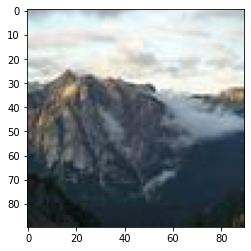

In [ ]:
image1 = X_train[10]
plt.imshow(image1.squeeze())
print(labelAndNames[y_train[10]])

In [ ]:
# HINT: note that your training time should not take more than 2 hours.

# TODO:
# Pick your hyper parameters
max_epoch = 20
train_batch = 32
test_batch = 64
learning_rate = 0.1 # try learning rate from the interval [1e-1, 1e-4] # try learning rate from the interval [1e-1, 1e-4]  0.0001, 0.001, 0.01 and 0.1

use_gpu = torch.cuda.is_available()

# Create train dataset loader
train = SceneDataset(X_train, y_train)
train_loader = DataLoader(train, batch_size=train_batch)

# Create validation dataset loader
val = SceneDataset(X_val, y_val)
validation_loader = DataLoader(val, batch_size=test_batch)

# Create test dataset loader
test = SceneDataset(X_test, y_test)
test_loader = DataLoader(test, batch_size=test_batch)

Epoch 1:		 train_loss: 1.72		 train_accuracy: 0.49		 validation_loss: 0.88		 validation_accuracy: 0.62
Saving new best Transfer Learning SGD with vald_loss: 0.88
Epoch 2:		 train_loss: 0.78		 train_accuracy: 0.68		 validation_loss: 0.74		 validation_accuracy: 0.67
Saving new best Transfer Learning SGD with vald_loss: 0.74
Epoch 3:		 train_loss: 0.68		 train_accuracy: 0.73		 validation_loss: 0.64		 validation_accuracy: 0.72
Saving new best Transfer Learning SGD with vald_loss: 0.64
Epoch 4:		 train_loss: 0.56		 train_accuracy: 0.78		 validation_loss: 0.56		 validation_accuracy: 0.75
Saving new best Transfer Learning SGD with vald_loss: 0.56
Epoch 5:		 train_loss: 0.47		 train_accuracy: 0.82		 validation_loss: 0.54		 validation_accuracy: 0.76
Saving new best Transfer Learning SGD with vald_loss: 0.54
Epoch 6:		 train_loss: 0.41		 train_accuracy: 0.84		 validation_loss: 0.55		 validation_accuracy: 0.78
Epoch 7:		 train_loss: 0.35		 train_accuracy: 0.86		 validation_loss: 0.63		 validation

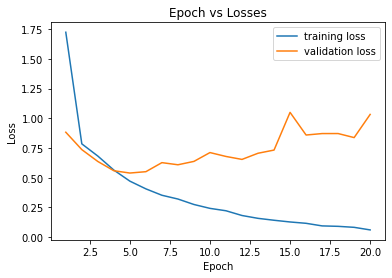

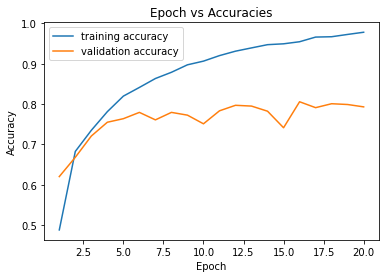

In [ ]:
#############################################################################################
# initialize your network
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(in_features = num_features, out_features = 4) 
# model.fc = replace its output layer with a linear layer (in_features, proper number according to your output classes)
    
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, weight_decay = 5e-04) # you can play with momentum and weight_decay parameters as well

# define your loss function
criterion = nn.CrossEntropyLoss()
        
if use_gpu:
    model = model.cuda()
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
PATH_CNN_TRANSFER = "drive/My Drive/best_cnn_transfer.pth"
min_vald_loss = np.inf
history = {'train_accuracy': [], 'vald_accuracy':[], 'train_loss': [], 'vald_loss': []}
    
for epoch in range(max_epoch):
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        input = inputs.permute(0, 3, 1, 2)
        outputs = model(input.float())
        preds = torch.argmax(outputs, dim=1)
        train_correct += torch.sum(preds==labels)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

#    Validation
    with torch.no_grad():
        vald_loss = 0.0
        vald_correct = 0
        for data in validation_loader:
            images, labels = data
            images, labels = images.cuda(), labels.cuda()
            images = images.permute(0, 3, 1, 2)
            outputs = model(images.float())
            preds = torch.argmax(outputs, dim=1)
            vald_correct += torch.sum(preds==labels)
            loss = criterion(outputs, labels)
            vald_loss += loss.item()
    print(f'Epoch {epoch+1}:\t\t train_loss: {(train_loss / len(train_loader)):.2f}\t\t train_accuracy: {(train_correct / (len(train_loader) * train_batch)):.2f}\t\t validation_loss: {(vald_loss / len(validation_loader)):.2f}\t\t validation_accuracy: {(vald_correct / (len(validation_loader) * test_batch)):.2f}')
    if (vald_loss / len(validation_loader)) < min_vald_loss:
        print(f'Saving new best Transfer Learning SGD with vald_loss: {(vald_loss / len(validation_loader)):.2f}')
        min_vald_loss = (vald_loss / len(validation_loader))
        torch.save(model.state_dict(), PATH_CNN_TRANSFER)

    history['train_loss'].append(train_loss / len(train_loader))
    history['vald_loss'].append(vald_loss / len(validation_loader))
    history['train_accuracy'].append(train_correct / (len(train_loader) * train_batch))
    history['vald_accuracy'].append(vald_correct / (len(validation_loader) * test_batch))

print(f'Best validation loss: {min_vald_loss}')

# plot losses vs epoch 
plt.plot([i+1 for i in range(max_epoch)], history['train_loss'], label='training loss')
plt.plot([i+1 for i in range(max_epoch)], history['vald_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Losses')
plt.legend(loc='upper right')
plt.show()

# plot accuracies vs epoch
plt.plot([i+1 for i in range(max_epoch)], history['train_accuracy'], label='training accuracy')
plt.plot([i+1 for i in range(max_epoch)], history['vald_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracies')
plt.legend(loc='upper left')
plt.show()

####Test for Transfer Learning [10 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Explain the advantages of using transfer learning. Is it better to reuse a pretrained model instead of training a model from scratch? Why?

Answer:  The test results from the model that uses SGD as optimizer works the worst compared to others whereas pretrained model is the best model. Using a pretrained model requires less training (such as 20 epochs whereas cnn models required 300 epochs) and requires less effort in building the model architecture. In other words, training a model from scratch as we do in cnn model requires a very large dataset and takes a lot of time to train. So a pretrained model converge fastly because its weights are already optimized and saves much time. For instance in SGD with learning_rate = 0.0001, the accuracy for sea class was 0.28 which is terrible however when we use SGD with a pretrained model we have ended up with 0.82 accuracy for the same label. So pretrained model really improves the model and lowers the computational complexity. 

Macro Precision: 0.7971658250425341 Macro Recall: 0.7842565688106479 Macro F1: 0.7807865545344755
Accuracy 0.783
Accuracies for each class:
	Accuracy for sea              0.5859375
	Accuracy for forest           0.978
	Accuracy for glacier          0.8130081300813008
	Accuracy for mountain         0.7600806451612904


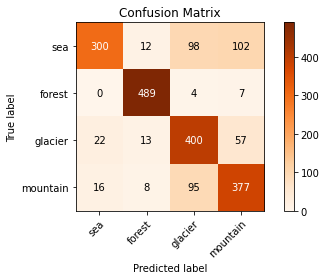

In [ ]:
# Test CNN
# load best model
model.load_state_dict(torch.load(PATH_CNN_TRANSFER))

# evaluate on test set
# model = model.eval()

predictions = []

with torch.no_grad():
#   iterate over test batches
    for data in test_loader:
        images, labels = data
        images = images.permute(0, 3, 1, 2)
        images, labels = images.cuda(), labels.cuda()
        outputs = model(images.float())
        _, predicted2 = torch.max(outputs.data, 1)
        predictions.extend(predicted2.tolist())

#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

cm = confusion_matrix(test.labels,predictions)
# plot confusion matrix
plot_cm(cm, labelAndNames.values())
pscore = precision_score(test.labels, predictions, average="macro")
rscore = recall_score(test.labels, predictions, average="macro")
f1 = f1_score(test.labels, predictions, average="macro")
print("Macro Precision:", pscore, "Macro Recall:", rscore,"Macro F1:" ,f1)
print("Accuracy", accuracy_score(test.labels,predictions))
acc_per_class = cm.diagonal()/cm.sum(1)
print("Accuracies for each class:")
for i, acc in enumerate(acc_per_class):
    print(f'\tAccuracy for {labelAndNames[i]}'.ljust(30, ' '), acc)